In [1]:
%reload_ext autoreload
%autoreload 2

In [51]:
import sys

import matplotlib.pyplot as plt
import numpy as np

from mcopt.pipeline import Pipeline
from mcopt import MorseGraph, ot

sys.path.append('../')
from util import (
  draw_graphs, 
  compare_couplings,
  calculate_max_match_distances,
  plot_max_match_results,
  tune_m,
  run_pfgw
)

In [49]:
cmap = 'cool'

dist = 'geo'
hist = 'degree'

alpha = 0.5

In [4]:
pipeline = Pipeline('../../pipeline.config.json')

wind = pipeline.graph('wind')

> Generating wind graph
  config unchanged, loading graph
  loaded 15 frames


In [5]:
src = wind.frames[0]

dests = wind.frames.copy()
dests.pop(0)

len(dests)

14

# Initial Graphs

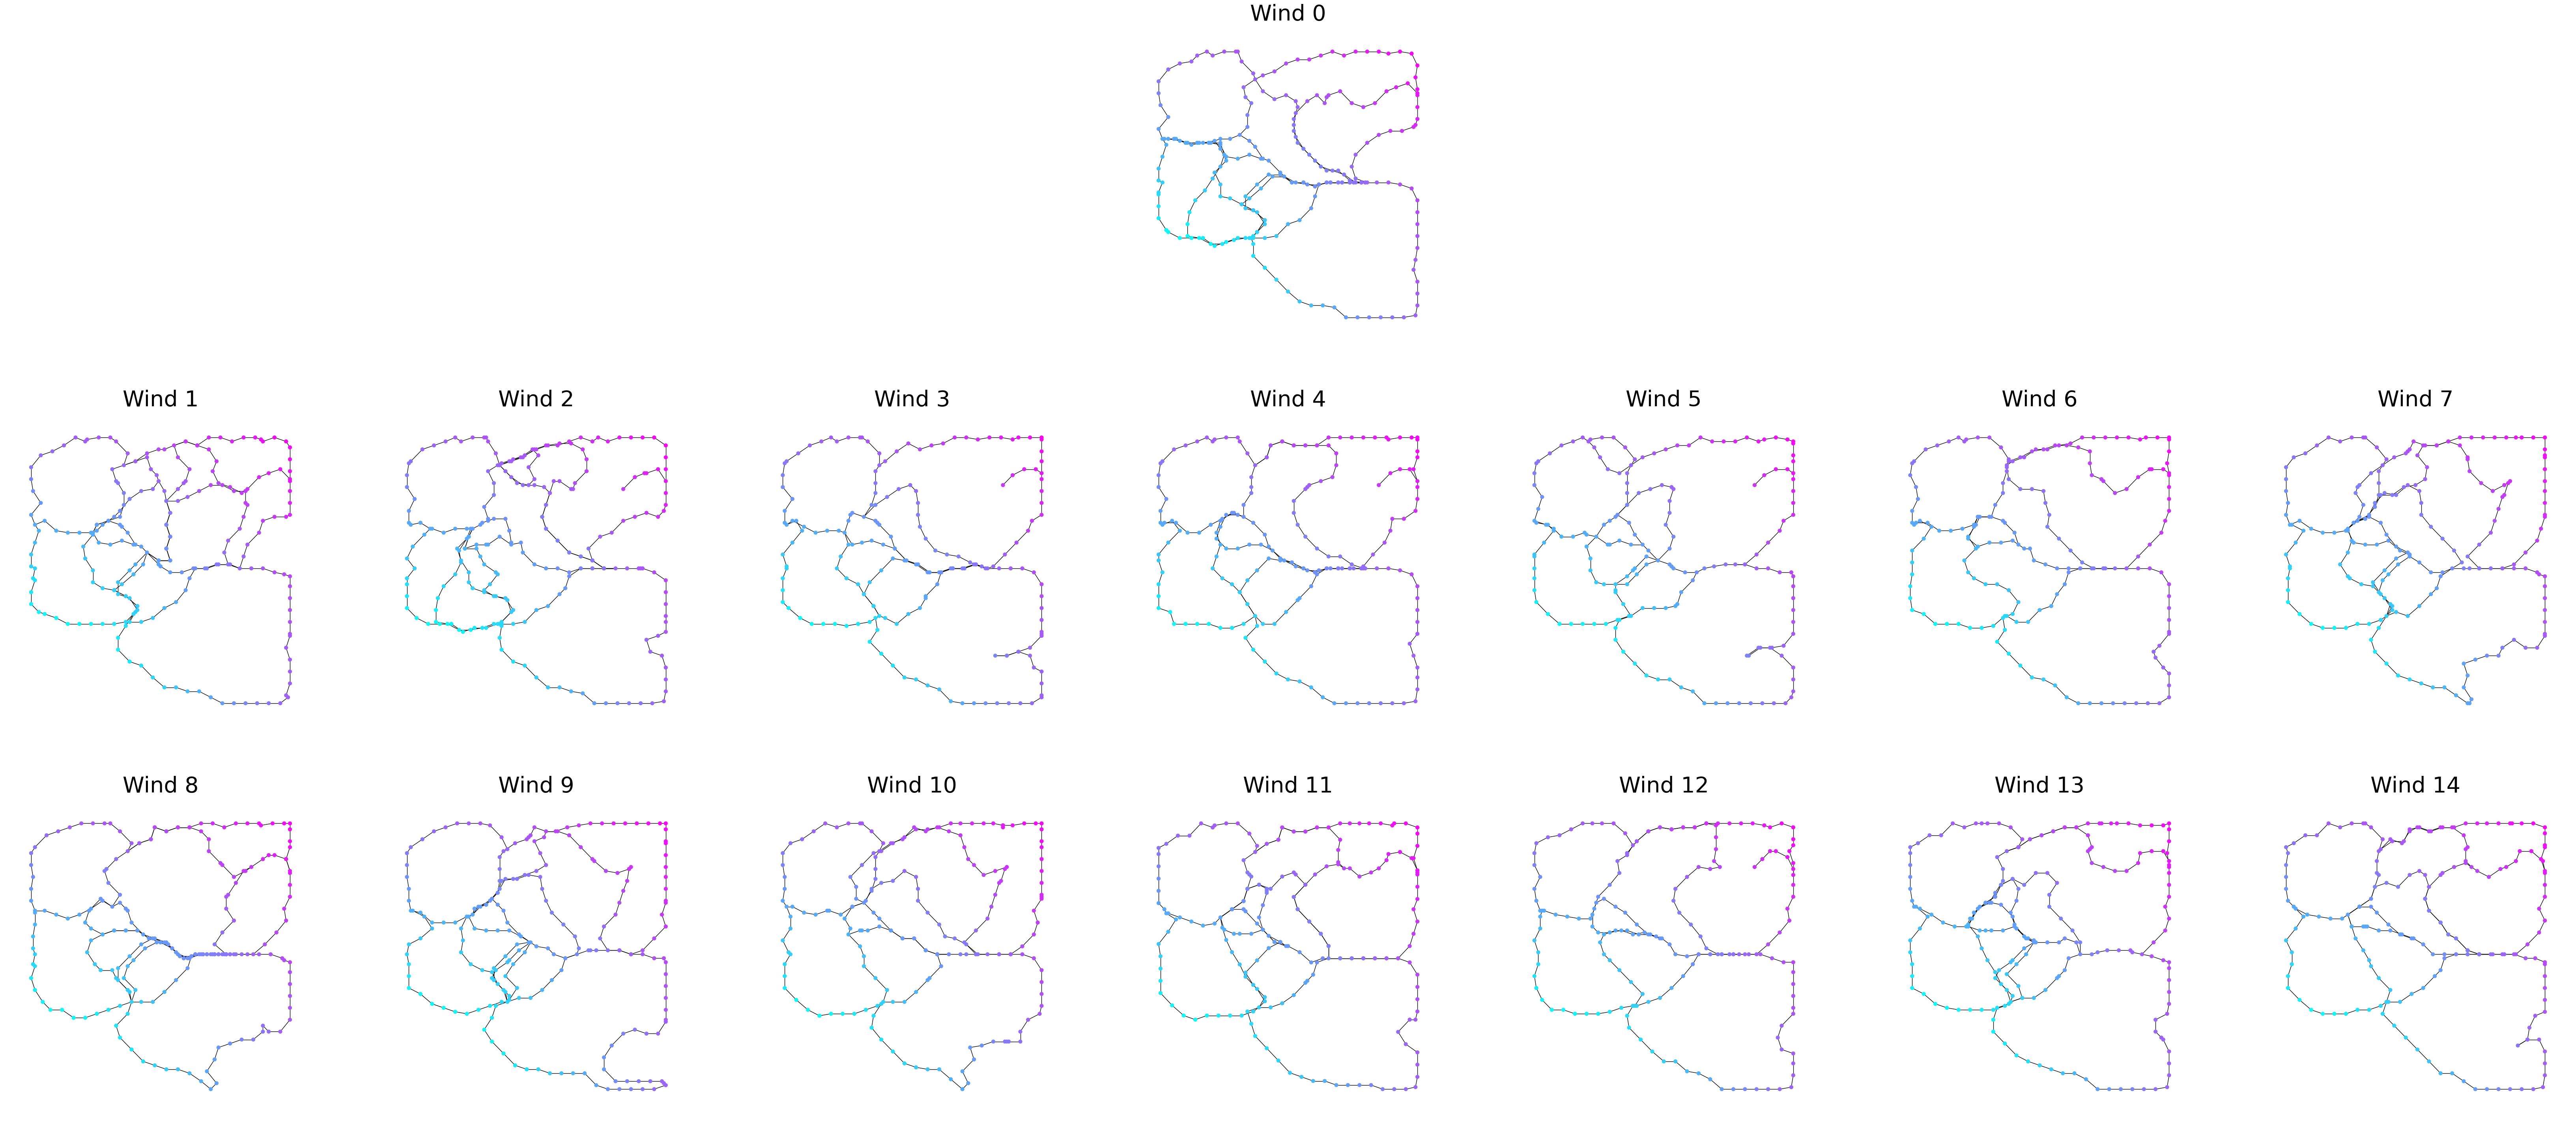

In [6]:
fig = draw_graphs(
  src, dests, 
  width=7, 
  height=3, 
  cmap='cool', 
  src_title='Wind 0', 
  dest_title_fmt='Wind {i}'
)

# Tune m

In [12]:
m_start = 0.85
num_ms = 20

ms = np.array([m_start + (1 - m_start) / num_ms * i for i in range(num_ms + 1)])
ms

array([0.85  , 0.8575, 0.865 , 0.8725, 0.88  , 0.8875, 0.895 , 0.9025,
       0.91  , 0.9175, 0.925 , 0.9325, 0.94  , 0.9475, 0.955 , 0.9625,
       0.97  , 0.9775, 0.985 , 0.9925, 1.    ])

In [35]:
max_match_results = calculate_max_match_distances(
  src, dests, ms, alpha=alpha, hist=hist, dist=dist
)

Running pfGW for each (destination, m):   0%|          | 0/294 [00:00<?, ?it/s]

[(0.8574999999999999, 14.577379737113251),
 (0.8875, 17.10263137648707),
 (0.9325, 30.99193443462347),
 (0.9625, 36.62308015445998),
 (0.985, 38.73306081372863),
 (1.0, 39.223717314910374)]

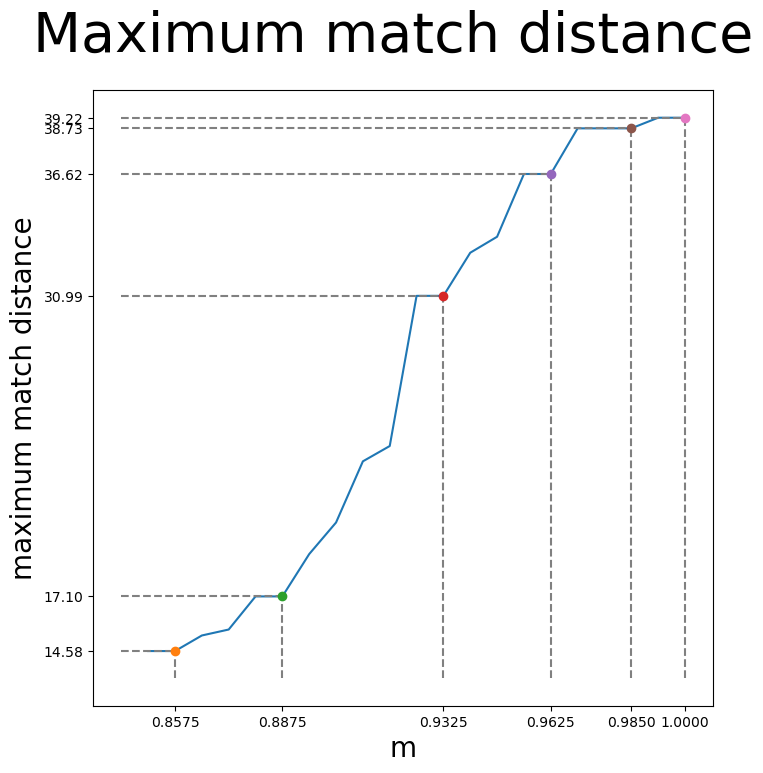

In [36]:
fig, opt_Ls = plot_max_match_results(max_match_results, ms)
fig.suptitle('Maximum match distance', fontsize=40)

opt_Ls

In [41]:
optimal_ms = tune_m(opt_Ls, src, dests, m_step=0.001, alpha=alpha, hist=hist, dist=dist)

Running pfGW for each (destination, m):   0%|          | 0/84 [00:00<?, ?it/s]

0.8584999999999999
0.8594999999999999
0.8604999999999999
0.8614999999999999
0.8624999999999999
0.8634999999999999
0.8644999999999999
0.8654999999999999
0.8664999999999999
0.8674999999999999
0.8684999999999999
0.8694999999999999
0.8704999999999999
0.8714999999999999
0.8724999999999999
0.8734999999999999
0.8744999999999999
0.8755
0.8765
0.8775
0.8785
0.8795
0.8805
0.8815
0.8825
0.8835
0.8845
0.8855
0.8865
0.8875
0.8885
0.8895
0.8905
0.8915
0.8885
0.8895
0.8905
0.8915
0.8925
0.8935
0.8945
0.8955
0.8965
0.8975
0.8985
0.8995
0.9005
0.9015
0.9025
0.9035
0.9045
0.9055
0.9065
0.9075
0.9085
0.9095
0.9105
0.9335
0.9345
0.9355
0.9365
0.9375
0.9385
0.9395
0.9405
0.9415
0.9425
0.9435
0.9445
0.9455
0.9465
0.9475
0.9485
0.9495
0.9505
0.9515
0.9525
0.9535
0.9545
0.9555
0.9565
0.9575
0.9585
0.9595
0.9605
0.9615
0.9625
0.9635
0.9645
0.9655
0.9665
0.9675
0.9685
0.9695
0.9705
0.9715
0.9725
0.9735
0.9745
0.9755
0.9765
0.9775
0.9785
0.9795
0.9805
0.9815
0.9825
0.9835
0.9845
0.9855
0.9865
0.9875
0.9885
0.989

In [50]:
pfgw_global_couplings = {}
pfgw_local_couplings = {}

for L_i, (_, L_star) in enumerate(opt_Ls):
  print(f'L* = {L_star}')
  
  m_global = optimal_ms[L_i].min()
  
  print(f'global m = {m_global}')
  
  pfgw_global_couplings[L_star] = run_pfgw(src, dests, m_global, alpha=alpha, hist=hist, dist=dist)
  
  print(f'local ms = {optimal_ms[L_i]}')
  pfgw_local_couplings[L_star] = run_pfgw(src, dests, optimal_ms[L_i], alpha=alpha, hist=hist, dist=dist)

L* = 14.577379737113251
m_global = 0.8584999999999999


Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

L* = 17.10263137648707
m_global = 0.8885


Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

L* = 30.99193443462347
m_global = 0.9365


Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

L* = 36.62308015445998
m_global = 0.9635


Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

L* = 38.73306081372863
m_global = 0.989


Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

L* = 39.223717314910374
m_global = 1.0


Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

Running fGW for each destination:   0%|          | 0/14 [00:00<?, ?it/s]

In [52]:
len(pfgw_global_couplings)

6

In [53]:
len(pfgw_local_couplings)

6

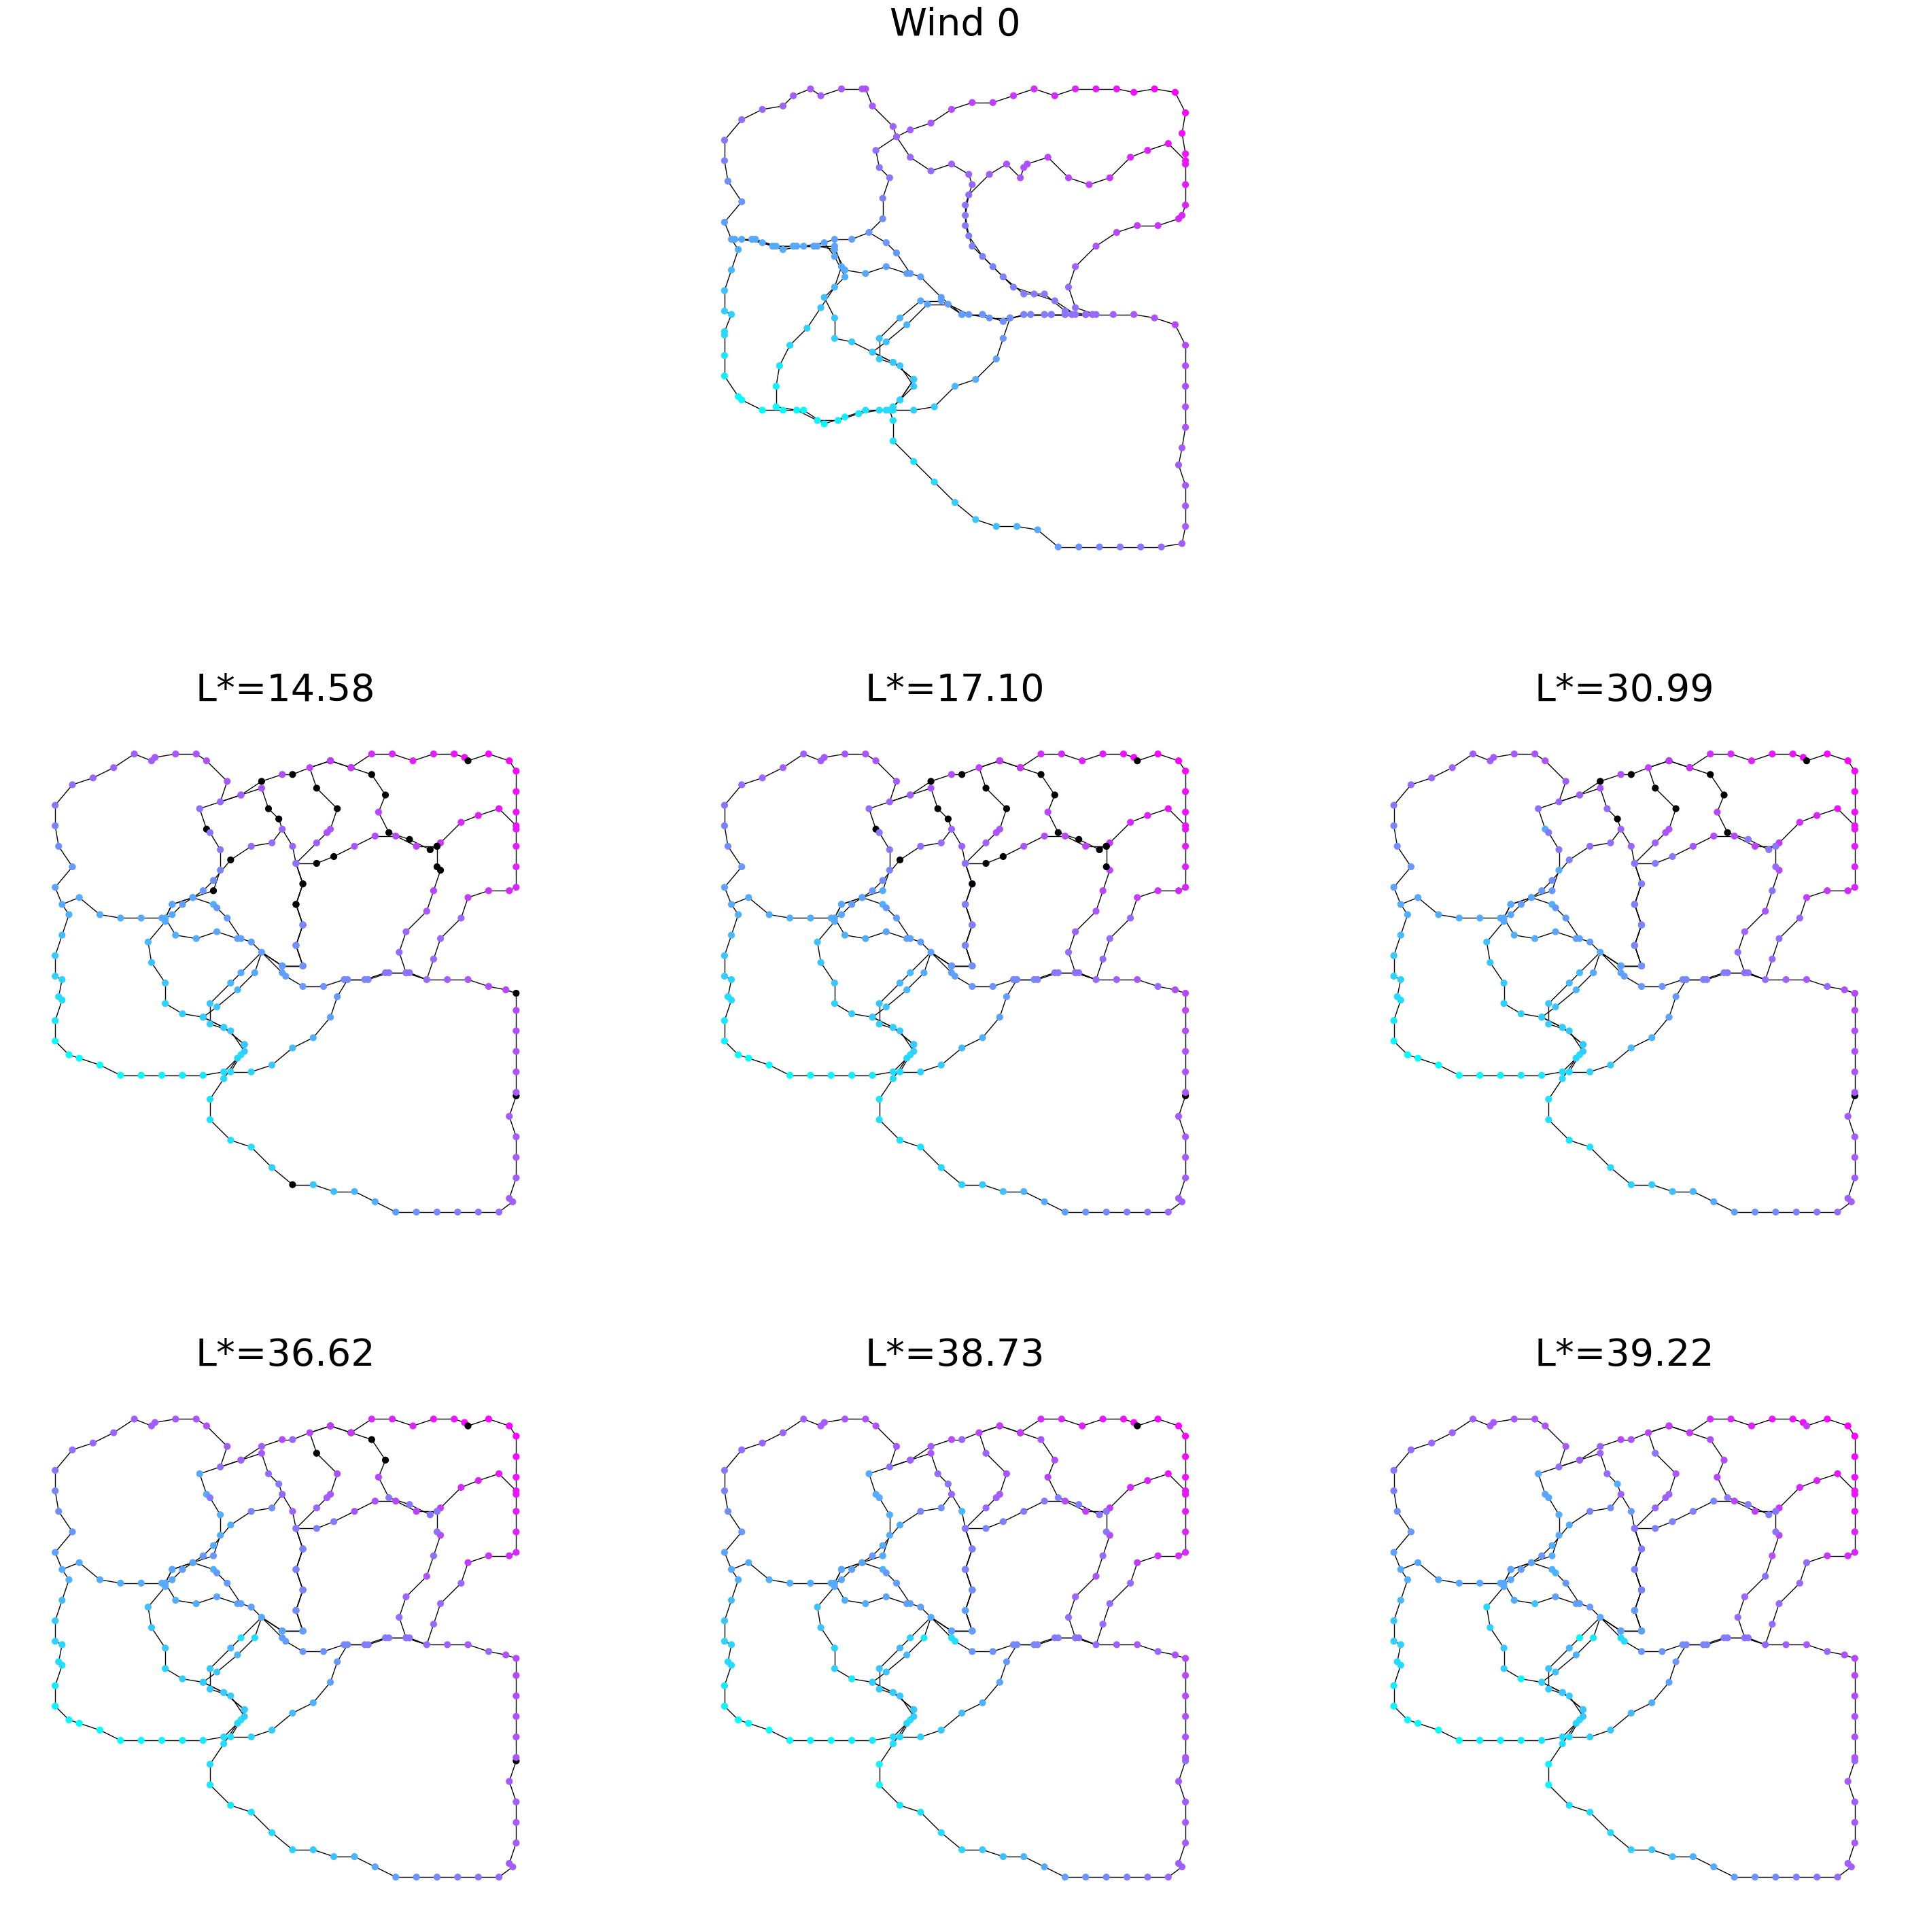

In [58]:
fig = compare_couplings(
  src, 
  dests[1], 
  couplings={'L*={:3.2f}'.format(L_star) : couplings[1] for L_star, couplings in pfgw_global_couplings.items()},
  width=3, 
  height=3, 
  cmap='cool', 
  src_title='Wind 0',
)